References:

Having never played the game of Risk previously, I first had to familiarize myself with the rules of the game: https://www.ultraboardgames.com/risk/game-rules.php
During my research for this assignment, I read a number of interesting articles / papers using Python to analyse the game of Risk including:
Hasbro Risk Part 1: Mechanics and basic probabilities https://medium.com/techfront/winning-at-risk-with-python-part-1-40d17d39d1e2
DataGenetics RISK Analysis: http://datagenetics.com/blog/november22011/index.html

However, based on my current level of Python aptitude, the following resource from The Python Coding Book was the most intuitive for me:
https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/

Brief (Part One):

The initial brief is to simulate 1000 individual battle rounds in Risk (3 attackers vs 2 defenders) and plot the results.

There are three possible outcomes for each individual battle from the Attacker's perspective: 
1. Attacker wins with two dice.
2. Attacker wins with one die and loses with the other.
3. Attacker wins with no dice.

A pie chart with the 'Attacker Win' percentages should be a good way to represent these outcomes.

Pseudo Code:

- Generate a 3x1000 array with random values from 1-6, representing the Attackers rolls.
- Sort the Attackers rolls in descending order, and drop the lowest value which is not used in this Risk battle situation.
- Generate a 2x1000 array with random values from 1-6, representing the Defenders rolls.
- Sort the Defenders rolls in descending order.
- Compare Attacker v Defender rolls to provide outcomes of the individual battles.
- Plot the results

Import the librarires we will be using for this assignment.

In [100]:
import numpy as np
import matplotlib.pyplot as plt

Set random number generator 'rng' and 'simuations' variables.

In [101]:
# For random number generation, we use numpy's Random Generator recommended constructor default_rng: 
# https://numpy.org/doc/stable/reference/random/generator.html#random-generator

rng = np.random.default_rng()

In [102]:
# Set number of simulations as a variable
simulations = 1000

Generate simulations of Attacker and Defender dice rolls, sorting them in descending order.

In [103]:
# Generate #simulations of Attacker dice rolls and store in a 2 dimensional (simulations, 3) numpy array.
attack = rng.integers(1, 7, size = (simulations, 3))
# Sort (ascending) and then flip to sort (descending).
attack.sort()
attack = np.flip(attack)
print(attack)

[[6 3 1]
 [4 4 2]
 [4 2 1]
 ...
 [6 1 1]
 [6 6 5]
 [6 3 2]]


In [104]:
# Generate #simulations of Defender dice rolls and store in a 2 dimensional (simulations, 2) numpy array.
defence = rng.integers(1, 7, size = (simulations, 2))
# Sort (ascending) and then flip to sort (descending).
defence.sort()
defence = np.flip(defence)
print(defence)

[[5 3]
 [5 2]
 [5 4]
 ...
 [2 1]
 [3 2]
 [5 5]]


Compare Attack versus Defence dice and store as 'Result'.

In [105]:
# https://www.geeksforgeeks.org/python-operations-on-numpy-arrays/
# https://www.w3schools.com/python/numpy/numpy_array_slicing.asp 
# https://stackoverflow.com/questions/10625096/extracting-first-n-columns-of-a-numpy-matrix
# [start:end] [:, :2] specifies all rows (start = 0 and end = length of array), first 2 columns.
Result = attack[:, :2] > defence[:, :2]
print(Result)

[[ True False]
 [False  True]
 [False False]
 ...
 [ True False]
 [ True  True]
 [ True False]]


Count the number of true elements (representing Attacker Wins) in our Numpy array using count_nonzero() method: https://btechgeeks.com/python-count-number-of-true-elements-in-numpy-array-in-python/

In [127]:
# axis=1 means return count row-wise
attack_wins = np.count_nonzero(Result, axis=1)
print(count)

[1 1 0 1 2 2 0 2 2 2 1 0 2 1 2 2 1 1 0 2 1 1 2 2 0 0 2 2 0 0 2 2 2 0 2 2 0
 1 0 2 1 1 1 2 0 0 1 0 1 1 2 2 0 2 2 2 1 0 0 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1
 1 2 1 2 0 2 2 1 1 2 0 1 1 1 0 2 0 0 0 2 0 2 1 2 2 2 1 2 1 1 2 1 0 0 2 2 1
 0 0 1 1 2 1 1 2 1 0 2 1 2 1 2 0 1 0 2 1 2 1 2 2 0 1 1 0 0 2 2 1 0 0 2 2 0
 1 1 2 2 1 1 0 1 0 0 1 0 2 2 1 0 1 2 0 2 1 2 1 2 2 1 1 2 2 2 1 0 2 1 2 2 0
 0 2 2 1 0 0 1 0 0 0 2 1 1 2 1 2 2 1 1 0 0 2 0 2 2 1 1 0 1 0 0 2 2 1 2 2 2
 0 2 2 2 2 2 1 1 0 0 1 0 2 0 2 1 0 2 2 2 0 2 1 2 2 2 2 0 0 1 1 1 1 0 0 2 0
 0 0 2 1 2 2 1 2 1 1 0 0 0 2 1 0 0 2 1 0 2 0 2 1 1 0 2 2 2 2 1 2 2 2 2 1 2
 0 2 1 1 2 2 0 0 0 1 1 0 1 0 1 2 2 0 2 0 0 2 1 2 2 2 1 2 1 0 0 1 2 0 1 1 1
 1 2 0 0 0 1 1 0 1 1 2 2 1 2 2 1 2 1 1 2 2 0 0 2 1 2 2 1 2 2 2 0 1 1 2 1 0
 0 1 1 2 2 0 2 1 0 1 0 1 0 2 2 1 2 1 2 2 0 0 0 2 0 2 2 2 2 2 0 0 0 1 0 2 0
 1 2 0 0 2 0 1 0 1 0 2 2 0 2 0 2 0 1 1 0 1 2 1 1 0 2 0 0 1 1 0 2 2 2 1 0 1
 1 2 1 0 2 1 1 1 1 2 2 2 2 2 1 1 0 2 1 0 2 1 0 2 0 2 2 0 1 2 2 1 2 1 1 1 2
 2 1 2 2 1 2 1 0 2 2 0 2 

Count the frequency of the three different (unique) outcomes: https://www.geeksforgeeks.org/how-to-count-the-frequency-of-unique-values-in-numpy-array/

In [121]:
unique, frequency = np.unique(attack_wins, return_counts=True)

print (unique, frequency)

[0 1 2] [275 317 408]


Now plot the attack win percentages on a pie chart

Text(0.5, 1.0, 'Number of Attacker Wins (%)')

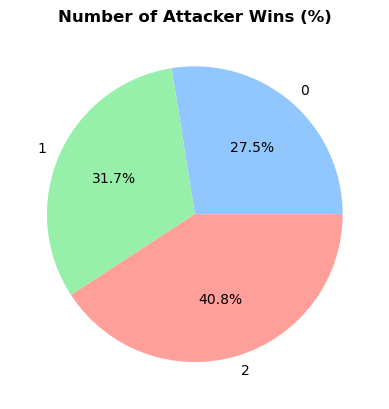

In [125]:
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

plt.style.use('seaborn-v0_8-pastel')

fig, ax = plt.subplots()
ax.pie(frequency, labels=unique, autopct='%1.1f%%')

# Title & Labels
ax.set_title('Number of Attacker Wins (%)', weight='bold')

Brief (Part Two):

Extend the above to simulate a full series of rounds for armies of arbitrary sizes, until one side is wiped out, and plots the results.